# **Business Process and Data Analysis**

# **Student ID : st20219772**

# **Sales report for Nykaa online shopping system**

# **Introduction**

# **Problem Statement**

The purpose of the project is to analysis the sales report of the Nykaa over India with the help of exploratory data analysis (EDA). Nykaa is one of the biggest retail company in India which provides beauty and wellness products.

## Data source
https://www.kaggle.com/datasets/susant4learning/nykaacosmeticsproductsreview2021?select=Nykaa_Product_Review.csv

## Step 1: Importing libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns

# Step 2 : Reading the data set and allocating it to the variable

Whenever google colab is used the following two lines code should be uncommented.

In [2]:
# Mounting Google drive to Google Colab

#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Moving to that particular directory
#%cd "/content/drive/My Drive/Colab"

In [4]:
# Reading the file
nykaa_df = pd.read_csv('Nykaa_Product_Review.csv')

# Step 3 : Dataset description 

In [5]:
# Printing first 5 rows by using head funtion
print(nykaa_df.head())

                         Product Id Product Brand Code   Retailer  \
0  b77f3da33be6e65f6183da6ada8c07ca             BZ1000  nykaa.com   
1  f54658c5d511195b6621a640fb743b1b             BH5931  nykaa.com   
2  cdf6b3387f8976c8e38ad150173dbb6d             BH7276  nykaa.com   
3  424755c11c78b2b24ff13c675baf5d19             BZ1000  nykaa.com   
4  f7f76573099db0058ef5264c35d9d02e             BZ1000  nykaa.com   

                                Product Category    Product Brand  \
0                        Makeup > Face > Contour      ETUDE HOUSE   
1                          Brand > L'Oreal Paris    L'Oreal Paris   
2                     Makeup > Face > Foundation    The Body Shop   
3  Health & Wellness > Good for You > Super Food    True Elements   
4                      Makeup > Lips > Lip Stain  Nykaa Cosmetics   

                                        Product Name  Product Price  \
0                ETUDE HOUSE Face Color Shading - 02            600   
1  L'Oreal Paris Glow Mon Am

In [6]:
# Printing columns
nykaa_df.columns

Index(['Product Id', 'Product Brand Code', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')

In [7]:
# Checking data types
nykaa_df.dtypes

Product Id                  object
Product Brand Code          object
Retailer                    object
Product Category            object
Product Brand               object
Product Name                object
Product Price                int64
Product Url                 object
Market                      object
Product Description         object
Product Currency            object
Product Image Url           object
Product Tags                object
Product Contents            object
Product Rating             float64
Product Reviews Count      float64
Expected Category Count      int64
Expected Brand Count         int64
dtype: object

As per the results all the columns data types are either int or float or object.

**Checking for null values**

In [8]:
# Checking null values in ascending order
nykaa_df.isna().sum().sort_values(ascending=False)

Product Contents           301
Product Category            81
Product Reviews Count       59
Product Rating              59
Product Id                   0
Product Currency             0
Expected Category Count      0
Product Tags                 0
Product Image Url            0
Product Description          0
Product Brand Code           0
Market                       0
Product Url                  0
Product Price                0
Product Name                 0
Product Brand                0
Retailer                     0
Expected Brand Count         0
dtype: int64

The output is saying that there are no null values present for this data set that means the data is cleaned.

In [9]:
# Finding descritive analysis for the data frame.
nykaa_df.describe()

,Product Price,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
count,610.000000,551.000000,551.000000,610.000000,610.000000
mean,1019.014754,4.248457,364.891107,485.768852,121.144262
std,1352.519277,0.492113,1072.694529,667.910666,251.212381
min,25.000000,1.000000,0.000000,0.000000,0.000000
25%,180.000000,4.100000,3.000000,0.000000,0.000000
50%,447.000000,4.300000,22.000000,237.000000,0.000000
75%,1307.500000,4.500000,146.000000,725.750000,131.000000
max,9500.000000,5.000000,8513.000000,3484.000000,1530.000000


The describe function is used to find the statistical values for the entire data set columns such as mean, count, standard deviation, minimum value, lower quartile, median, upper quartile and maximum value.

In [10]:
# Information about the data frame
nykaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Id               610 non-null    object 
 1   Product Brand Code       610 non-null    object 
 2   Retailer                 610 non-null    object 
 3   Product Category         529 non-null    object 
 4   Product Brand            610 non-null    object 
 5   Product Name             610 non-null    object 
 6   Product Price            610 non-null    int64  
 7   Product Url              610 non-null    object 
 8   Market                   610 non-null    object 
 9   Product Description      610 non-null    object 
 10  Product Currency         610 non-null    object 
 11  Product Image Url        610 non-null    object 
 12  Product Tags             610 non-null    object 
 13  Product Contents         309 non-null    object 
 14  Product Rating           5

This data set contains 610 rows data.

In [11]:
# Correlation for all the columns by using corr funtion which is an inbuild funtion
nykaa_df.corr()

,Product Price,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
Product Price,1.000000,0.145329,-0.138843,-0.145586,0.131343
Product Rating,0.145329,1.000000,0.032917,-0.036507,0.026003
Product Reviews Count,-0.138843,0.032917,1.000000,-0.009625,0.024280
Expected Category Count,-0.145586,-0.036507,-0.009625,1.000000,0.122576
Expected Brand Count,0.131343,0.026003,0.024280,0.122576,1.000000


# **Step 4 : Data Cleaning**

The current data set has no null values and duplicates. So no need  to do any cleaning but for the assignment purpose researcher doing the cleaning. 




In [12]:
# Check for null values
nykaa_df.isna().sum()

Product Id                   0
Product Brand Code           0
Retailer                     0
Product Category            81
Product Brand                0
Product Name                 0
Product Price                0
Product Url                  0
Market                       0
Product Description          0
Product Currency             0
Product Image Url            0
Product Tags                 0
Product Contents           301
Product Rating              59
Product Reviews Count       59
Expected Category Count      0
Expected Brand Count         0
dtype: int64

<AxesSubplot:>

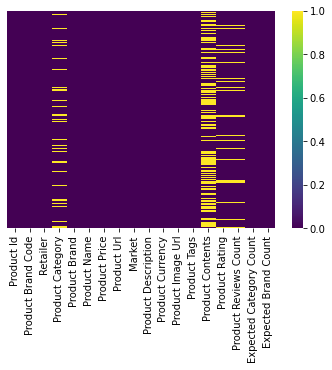

In [13]:
# heatmap
sns.heatmap(nykaa_df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

**Handling Missing / null / irregular information**

If there are null values from the set then for removing those we are using dropna function which deletes entire row which has Nan values.

In [14]:
# selecting some features for analysis
nykaa_features = nykaa_df[['Product Brand', 'Product Category','Product Description', 'Product Price', 'Product Reviews Count', 'Product Rating']]

In [15]:
# Checking for null values
nykaa_features.isna().sum()

Product Brand             0
Product Category         81
Product Description       0
Product Price             0
Product Reviews Count    59
Product Rating           59
dtype: int64

In [16]:
# Dropping the null values
nykaa_features.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\1417115625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_features.dropna(inplace=True)


After removing null values then check for Nan values again. 

In [17]:
# Checking for null values
nykaa_features.isna().sum()

Product Brand            0
Product Category         0
Product Description      0
Product Price            0
Product Reviews Count    0
Product Rating           0
dtype: int64

In [18]:
# Printing top 5 rows
nykaa_features.head()

,Product Brand,Product Category,Product Description,Product Price,Product Reviews Count,Product Rating
0,ETUDE HOUSE,Makeup > Face > Contour,Etude House Face Color Shading provides a shad...,600,4.0,4.6
1,L'Oreal Paris,Brand > L'Oreal Paris,It's time to skip the snooze button and get up...,454,147.0,4.3
2,The Body Shop,Makeup > Face > Foundation,Note: The Body Shop products will be dispatche...,1395,58.0,4.4
3,True Elements,Health & Wellness > Good for You > Super Food,Sunflower has always been admired for its beau...,175,0.0,5.0
4,Nykaa Cosmetics,Makeup > Lips > Lip Stain,It's no secret that a good lippie is a real mo...,539,934.0,4.0


In [19]:
# Finding the details about data
nykaa_features.describe()

,Product Price,Product Reviews Count,Product Rating
count,486.000000,486.000000,486.000000
mean,882.557613,384.080247,4.245885
std,1237.607217,1089.010287,0.490375
min,25.000000,0.000000,1.000000
25%,171.250000,3.000000,4.000000
50%,360.500000,22.000000,4.300000
75%,957.500000,150.000000,4.500000
max,7900.000000,8513.000000,5.000000


In [20]:
# info check for Nykaa
nykaa_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 609
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product Brand          486 non-null    object 
 1   Product Category       486 non-null    object 
 2   Product Description    486 non-null    object 
 3   Product Price          486 non-null    int64  
 4   Product Reviews Count  486 non-null    float64
 5   Product Rating         486 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 26.6+ KB


In [21]:
# Convert the Product Price, Reviews count and Rating in float
nykaa_features.astype({'Product Price':'float64','Product Rating':'float64'})
nykaa_features['Product Price']= nykaa_features['Product Price'].astype('float64')
nykaa_features['Product Rating']= nykaa_features['Product Rating'].astype('float64')

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3426523896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_features['Product Price']= nykaa_features['Product Price'].astype('float64')
C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3426523896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_features['Product Rating']= nykaa_features['Product Rating'].astype('float64')


For parameter consistency all the columns should be in same data type

# <b> Business Insights and Observations </b>

## Step 5 : Visualizations

Visualizations are the pictorical representation of the data which can be easily understand by end user without any difficulties.

<AxesSubplot:xlabel='Product Rating', ylabel='Product Price'>

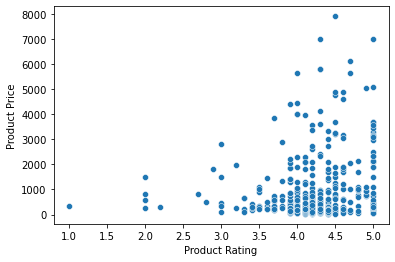

In [22]:
# Comparing Product Rating and Product Price
sns.scatterplot(x='Product Rating', y='Product Price', data = nykaa_features)

As per the results the highest price products are less rated compared to the lowest  products. Customers are purchasing products which are low price and they are satisfied with the product quality as they high rating.

<AxesSubplot:>

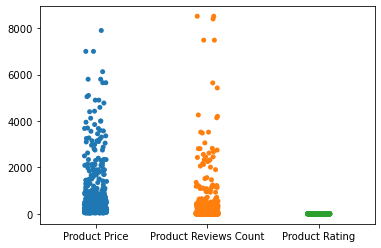

In [23]:
# Visualization
sns.stripplot(data=nykaa_features)

In [24]:
# Printing rand products using the Product Brand column
nykaa_features['Product Brand']

0          ETUDE HOUSE
1        L'Oreal Paris
2        The Body Shop
3        True Elements
4      Nykaa Cosmetics
            ...       
603             Jovees
605               Orly
606          BOLLYGLOW
608          L.A. Girl
609              M.A.C
Name: Product Brand, Length: 486, dtype: object

In [25]:
# Finding number of products of each brand
brands=[]
for brand in nykaa_features['Product Brand']:
    brands.append(brand)
    
from collections import Counter
c = Counter(brands)
pb=[];qty=[]
for k in c:
    pb.append(k)
    qty.append(c.get(k))

In [26]:
# Creating new dataframe
df=pd.DataFrame(
{"Product Brand":pb,
 "Qty":qty
})

In [27]:
# Sorting by most popular brands
df.sort_values(by='Qty', ascending=False, inplace=True)

In [28]:
# Printing top 10 rows
df_nykaa = df[0:10]
df_nykaa

,Product Brand,Qty
4,Nykaa Cosmetics,17
21,Himalaya,17
48,Lakme,14
30,Biotique,11
60,Nykaa Naturals,11
6,Nivea,10
7,Lotus Herbals,9
1,L'Oreal Paris,8
86,Kay Beauty,8
11,Lime Crime,7


Text(0.5, 1.0, 'Top 10 brands of Nykaa')

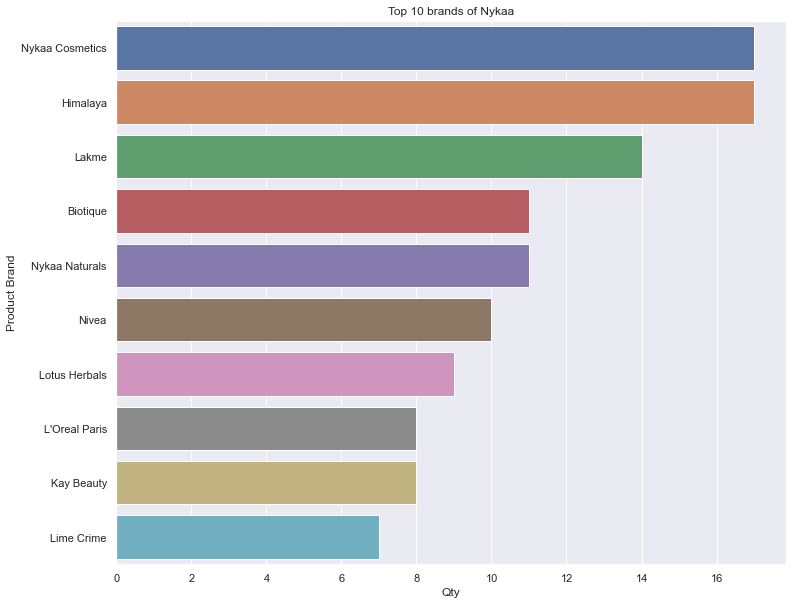

In [29]:
# Ploting product brand versus quantity
sns.set(rc = {'figure.figsize':(12,10)})
a = sns.barplot(data = df_nykaa,  x='Qty', y='Product Brand', color = None)
a.set_title ('Top 10 brands of Nykaa') 

As per the results Nykaa Cosmetics are more popular in the market along with Himalaya products. The least sold brand is Lime crime which is American cosmetic brand.

In [30]:
# selecting particular features from nykaa data frame for the futher analysis
nykaa_df1 = nykaa_features[['Product Brand','Product Price','Product Rating']]

In [31]:
# Finding the most costliest brands
nykaa_df1.sort_values (by="Product Price", ascending = False,inplace=True)
print(nykaa_df1)

      Product Brand  Product Price  Product Rating
485     Bobbi Brown         7900.0             4.5
18          CADIVEU         7000.0             4.3
378         CADIVEU         7000.0             5.0
106        Guerlain         6125.0             4.7
339      L'Occitane         5800.0             4.3
..              ...            ...             ...
591        Himalaya           41.0             4.5
112       KamaSutra           40.0             4.1
85         Himalaya           33.0             4.2
438           Liril           32.0             4.4
476  Godrej Protekt           25.0             4.4

[486 rows x 3 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_9064\3055115183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_df1.sort_values (by="Product Price", ascending = False,inplace=True)


In [32]:
# Printing costliest brands of Nykaa
nyka_costliest = nykaa_df1[:20]
nyka_costliest

,Product Brand,Product Price,Product Rating
485,Bobbi Brown,7900.0,4.5
18,CADIVEU,7000.0,4.3
378,CADIVEU,7000.0,5.0
106,Guerlain,6125.0,4.7
339,L'Occitane,5800.0,4.3
306,L'Occitane,5800.0,4.3
131,Givenchy,5650.0,4.7
573,Charlotte Tilbury,5650.0,4.0
326,Dunhill,5100.0,5.0
384,HERMÃˆS,5050.0,4.9


In [33]:
# Remove duplicate products having same brand
nykaa_no_duplicates = nyka_costliest.drop_duplicates(subset=['Product Brand']) 
nykaa_no_duplicates

,Product Brand,Product Price,Product Rating
485,Bobbi Brown,7900.0,4.5
18,CADIVEU,7000.0,4.3
106,Guerlain,6125.0,4.7
339,L'Occitane,5800.0,4.3
131,Givenchy,5650.0,4.7
573,Charlotte Tilbury,5650.0,4.0
326,Dunhill,5100.0,5.0
384,HERMÃˆS,5050.0,4.9
221,Montblanc,4590.0,4.6
558,Kenzo,4425.0,4.0


Finding the most costliest brand

Text(0.5, 1.0, 'Most costliest brands of Nykaa')

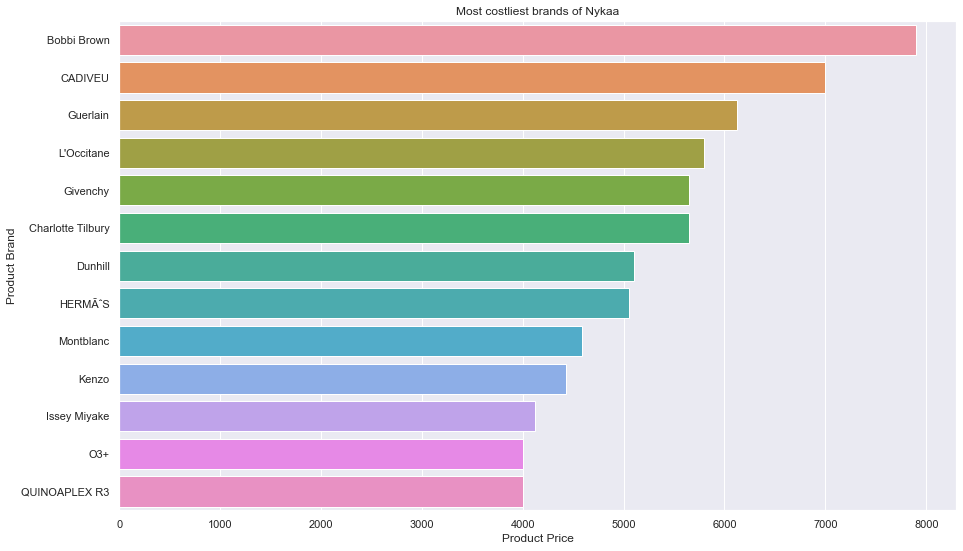

In [34]:
# Ordering the product brand based on the price
sns.set(rc = {'figure.figsize':(15,9)})
a = sns.barplot(data = nykaa_no_duplicates, y = 'Product Brand', x = 'Product Price')
a.set_title("Most costliest brands of Nykaa")

The costliest brand among all of them is Bobbi Brown (Rs.8000) and low price brand is Quinoaplex R3 with 4000 rupees. 

In [35]:
# Sorting products based on their rating
nykaa_df_rating = nykaa_df1.sort_values(by=['Product Rating','Product Price'], ascending=False)
nykaa_df_rating

,Product Brand,Product Price,Product Rating
378,CADIVEU,7000.0,5.0
326,Dunhill,5100.0,5.0
507,Burberry,3680.0,5.0
28,Burberry,3680.0,5.0
543,PRADA,3559.0,5.0
...,...,...,...
183,Paese Cosmetics,1499.0,2.0
134,IsaDora,810.0,2.0
113,As-It-Is Nutrition,576.0,2.0
142,First Water,269.0,2.0


In [36]:
# finding ratings using for loop
c = one_star = two_star = three_star = four_star = five_star = 0
for row in nykaa_df_rating.iterrows():
    c+=1
    if (row[1][2]==5.0):
        five_star+=1
    if (row[1][2]>=4.0 and row[1][2]<5.0):
        four_star+=1
    if (row[1][2]>=3.0 and row[1][2]<4.0):
        three_star+=1
    if (row[1][2]>=2.0 and row[1][2]<3.0):
        two_star+=1
    if (row[1][2]>=1.0 and row[1][2]<2.0):
        one_star+=1

Star rating in each category

In [37]:
# Count of each stars
ratings_nykaa_df=pd.DataFrame({
    'Stars':['Five Stars','Four Stars','Three Stars','Two Stars','One Stars'],
    'Count':[five_star, four_star, three_star, two_star, one_star]
})
ratings_nykaa_df

,Stars,Count
0,Five Stars,47
1,Four Stars,356
2,Three Stars,74
3,Two Stars,8
4,One Stars,1


Text(0.5, 1.0, 'Star ratings counting for Nykaa')

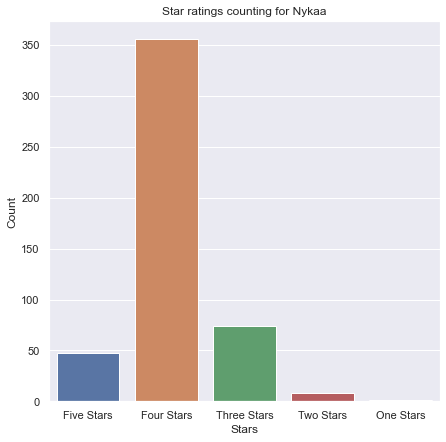

In [38]:
# Plotting the star ratings count
sns.set(rc = {'figure.figsize':(7,7)})
a = sns.barplot(data = ratings_nykaa_df, x='Stars',y='Count')
# Stylling
a.set_title('Star ratings counting for Nykaa')

Based on the above table the four_star rating is more and then three star which means people are satisfied with the products and one_star rating is low.

### Top categories

There are multiple beauty products categories offered by Nykaa, out of those the 10 categories are listed below.

In [39]:
# Keeping category and price in a new dataframe
nykaa_cat_df = nykaa_features[['Product Category','Product Price']]
nykaa_cat_df

,Product Category,Product Price
0,Makeup > Face > Contour,600.0
1,Brand > L'Oreal Paris,454.0
2,Makeup > Face > Foundation,1395.0
3,Health & Wellness > Good for You > Super Food,175.0
4,Makeup > Lips > Lip Stain,539.0
...,...,...
603,Natural > Types of Skin > Combination Skin,274.0
605,Makeup > Nails > Nail Polish,1000.0
606,Makeup > Eyes > Under Eye Concealer,665.0
608,Makeup > Makeup Kits > Eye Palettes,675.0


In [40]:
# As the category contains group so splting for deeper analysis
item = nykaa_cat_df['Product Category'][0]
word_array = item.split(" ")
# Printing the array
print(word_array)
# Printing the required value
print(word_array[-1])

['Makeup', '>', 'Face', '>', 'Contour']
Contour


In [41]:
# Adding face makeup items in a dataframe
items=[]
# Doing iterations
for row in nykaa_cat_df.iterrows():
    word_array = (row[1][0]).split(" ")
    item_name = word_array[-1]
    item_category = word_array[-3]
    # appending the item name to items
    items.append(item_name)

# Creating a dataframe through pandas
makeup_df_items = pd.DataFrame({
    'Item':items,
})

#Printing the items
makeup_df_items

,Item
0,Contour
1,Paris
2,Foundation
3,Food
4,Stain
...,...
481,Skin
482,Polish
483,Concealer
484,Palettes


In [42]:
# Adding price column to makeup_df_items from nykaa_df dataframe
makeup_df_items['Product Price'] = nykaa_df['Product Price']
makeup_df_items

,Item,Product Price
0,Contour,600
1,Paris,454
2,Foundation,1395
3,Food,175
4,Stain,539
...,...,...
481,Skin,1498
482,Polish,314
483,Concealer,393
484,Palettes,325


Text(0.5, 1.0, 'Listing product categories by Price ')

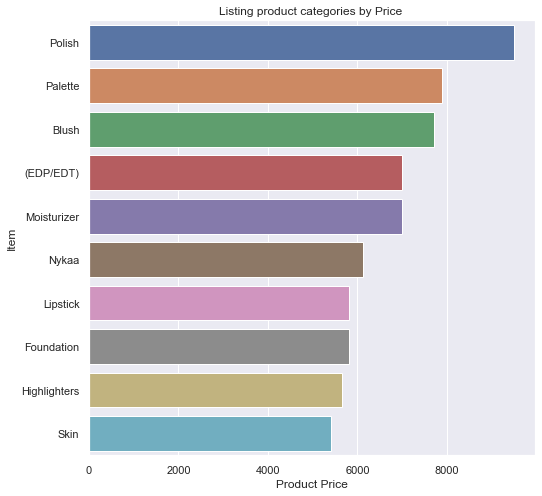

In [43]:
# Plotting the graph
sns.set(rc = {'figure.figsize':(8,8)})
# Sorting the values by price
df_items = makeup_df_items.sort_values(by = 'Product Price', ascending = False)

# Taking top 10 categories
b = sns.barplot(data = df_items[0:10], x = 'Product Price',y = 'Item')
# Title assign
b.set_title('Listing product categories by Price ')

Polish is the top rated category and Skin related items are under low price section.

In [44]:
# Taking two variables and assigning empty arrays
items = []
item_numbers = []

# importing collections from counter
from collections import Counter
# Counting the hashale objects in nykaa dataframe using counter function
c = Counter(df_items['Item'])
# Iteration for appending to items array
for i in c:
    # appending c to i
    items.append(i)
    # Quantity count
    item_numbers.append(c.get(i))

# Creating new dataframe with items and quantity values
nykaa_item_category = pd.DataFrame({
    'Items' : items,
    'Quantity' : item_numbers
})
# Sorting the items with respect to quantity
nykaa_item_category = nykaa_item_category.sort_values(by = 'Quantity', ascending=False)
# Printing the item categories
nykaa_item_category

,Items,Quantity
6,Lipstick,40
9,Skin,26
13,Concealer,19
5,Nykaa,17
2,Blush,15
...,...,...
79,Applicators,1
80,Mists,1
11,Deodorants/Roll-ons,1
38,Sanitizer,1


Text(0.5, 1.0, 'Higher sold products')

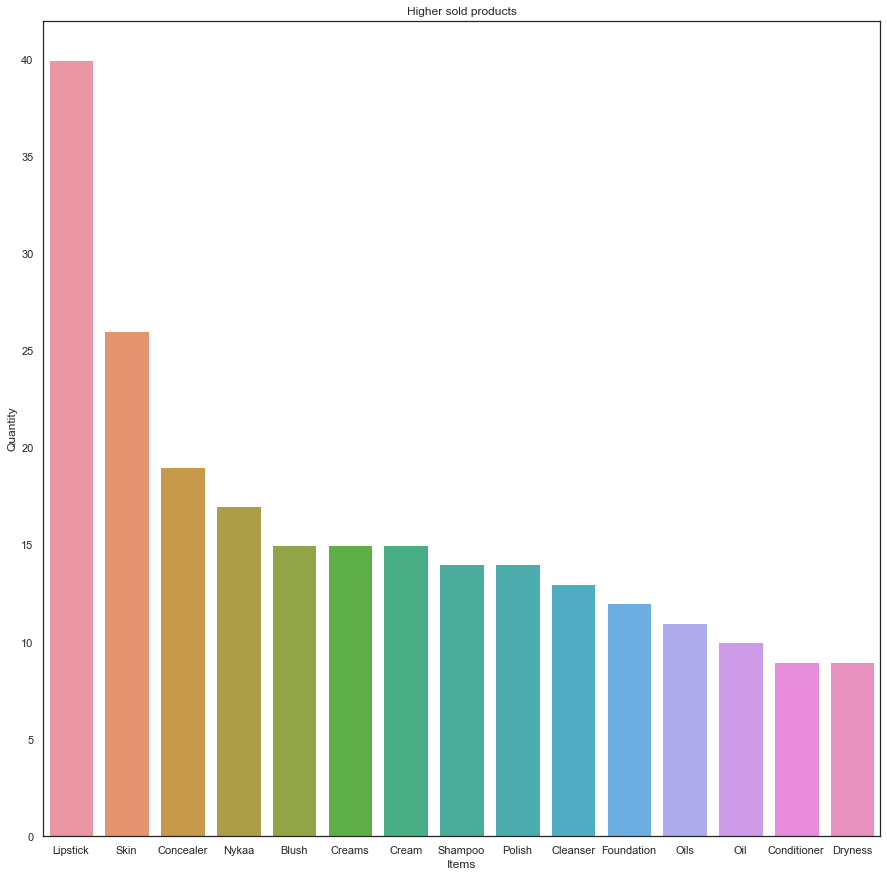

In [45]:
# figure size assigning
sns.set(rc = {'figure.figsize':(15,15)})

# Clearing background theme
sns.set_theme(style = "white", palette = 'Wistia')
# Plotting bar graph
a = sns.barplot(data = nykaa_item_category[:15] , x = 'Items', y = 'Quantity')
# Title
a.set_title('Higher sold products')

The most sold product is Lipstick because women preferred lipstick first out of all the makeup.

In [46]:
# Sorting the values ad removing duplicates
nykaa_reviews = nykaa_features[['Product Brand', 'Product Reviews Count']]
nykaa_reviews.sort_values(by = 'Product Reviews Count',ascending = False, inplace = True)
nykaa_reviews.drop_duplicates(subset = ['Product Brand'], inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\2977609002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_reviews.sort_values(by = 'Product Reviews Count',ascending = False, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9064\2977609002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykaa_reviews.drop_duplicates(subset = ['Product Brand'], inplace = True)


Text(0.5, 1.0, 'Top reviewed products')

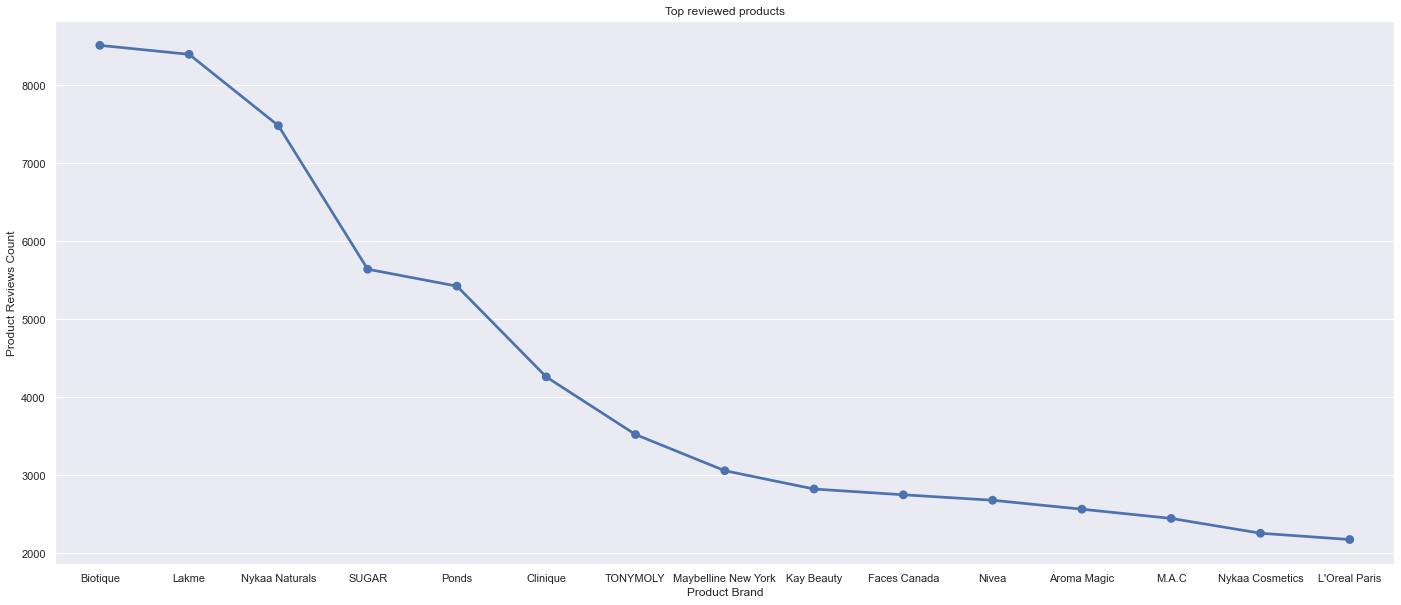

In [47]:
# Visualizations
sns.set(rc={'figure.figsize':(24,10)})
x = sns.pointplot(data = nykaa_reviews[:15], x = 'Product Brand',y = 'Product Reviews Count')
# stylling
x.set_title('Top reviewed products')

In [48]:
# droppig unwanted columns
df = nykaa_df[['Product Contents', 'Product Price', 'Product Brand']]
df.dropna(inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_9064\1385003081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Product Contents,Product Price,Product Brand
1,"G927637, Cyclopentasiloxane, Dimethicone, Isod...",454,L'Oreal Paris
3,Raw Sunflower Seeds,175,True Elements
6,"Aqua, Glycerin, Dicaprylyl Ether, Alcohol Dena...",260,Nivea
7,Key Ingredients:Activated Charcoal (Coconut Sh...,140,Lotus Herbals
11,"Formulated without parabens, sodium lauryl sul...",2090,Smashbox
...,...,...,...
598,"Aqua/Water, Sodium Laureth Sulfate, Sodium Lau...",205,Matrix
600,"Cocoa Butter, Avocado oil, Shea",399,VLCC
601,Active Ingredients: Octinoxate 3%Inactive Ingr...,1200,Physicians Formula
603,"Aloe Vera, Chamomile ext., Carrot ext., Liquor...",274,Jovees


In [49]:
# gathering items
a=[]
for row in df.itertuples():
    words=row[1].split(",")
    a.append(words)

b=[]
for w in a:
    for item in w:
        # appending the items to a
        b.append(item)

In [51]:
# Importing counter library
from collections import Counter
c = Counter(b)
component = [];quantity = []
# Iterations
for k in c:
    component.append(k)
    quantity.append(c.get(k))
nykaa_components = pd.DataFrame({
    'Component':component,
    'Quantity':quantity
})

# sorting the components
nykaa_components.sort_values(by = 'Quantity', ascending = False, inplace = True)
# printing the values
nykaa_components

,Component,Quantity
26,Phenoxyethanol,56
2,Dimethicone,51
15,Glycerin,51
84,Caprylyl Glycol,45
198,Tocopherol,38
...,...,...
1122,Pink Himalayan Salt,1
1121,Stevia Extract (Herbal Sweetener),1
1120,Natural Vanilla Flavour,1
1119,Papain),1


Text(0.5, 1.0, 'Highest available component in Nykaa products')

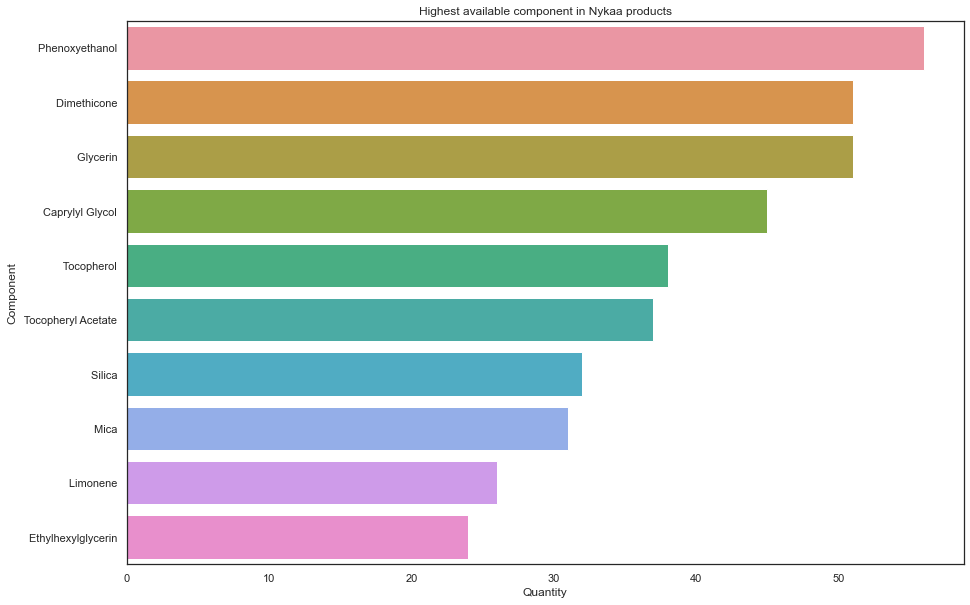

In [53]:
# Plotting Highest available component in Nykaa products
sns.set(rc={'figure.figsize':(15,10)})
# Clearing background theme
sns.set_theme(style = "white", palette = 'Wistia')
ax = sns.barplot(data = nykaa_components[:10], y = 'Component',x='Quantity')
# Styling
ax.set_title('Highest available component in Nykaa products')

Highest available component in Nykaa products is Phenoxyethanol which is used for synthetic preservative with concentration 1% and it has global approval. 

# <b> Conclusion and Recommendations</b>


After performing EDA Nykaa products have higher quality and selling popular brands. The ratings got from customers are good but very less people given five star rating which means Nykaa has to improve the quality of the products. Nykaa should consider the feedback from customer and assign it to the team for further analysis so that they can find their issues in the products and can improve them. Nykaa fashion selling top brands in India which makes the sales growth better. E-commerce industry concentration on attracting customers which can e done through many ways and Nykaa also following a way for attracting customers through maintain their site more interactive. It compares with other beauty markets and selling specified user friendly protected products. The components used in the items also very safe which made Nykaa best online shopping system.

As per the research Nykaa is small Business compared to Amazon and Flipcart. Nykaa is specially concentrating on women beauty products more than men, if it increases men beauty products also the sales would increase more along with demand. Nykaa should think about the global expansion quickly so that it will become top 10 E-commerce site globally. Since there is less data in this dataset, the author was unable to identify every feature. To better estimate future sales, machine learning can be used.  
